In [1]:
from blocked_gibbs import *

/Users/kakao/opt/anaconda3/lib/python3.9/site-packages/arviz/__init__.py:317: UserWarning: Trying to register the cmap 'cet_gray' which already exists.
  register_cmap("cet_" + name, cmap=cmap)
/Users/kakao/opt/anaconda3/lib/python3.9/site-packages/arviz/__init__.py:317: UserWarning: Trying to register the cmap 'cet_gray_r' which already exists.
  register_cmap("cet_" + name, cmap=cmap)


(800, 2)


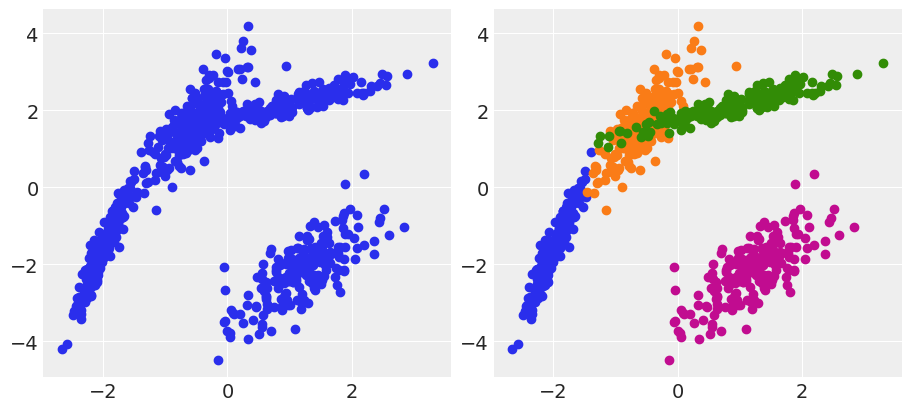

In [2]:
from scipy.stats import multivariate_normal

def random_cov(matrixSize=2):
    A = np.random.rand(matrixSize, matrixSize)
    B = np.dot(A, A.transpose())
    return B

np.random.seed(20220122)

a = np.array([[3, 2.5],[2.5, 3]])
b = np.array([[0.8, 1],[1, 10]])

# Prepare dataset
g1 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))
g2 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))
g3 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))
g4 = multivariate_normal(mean=np.random.uniform(-3, 3, size=2), cov=random_cov(2))

samples = list()
samples.append(g1.rvs(200))
samples.append(g2.rvs(200))
samples.append(g3.rvs(200))
samples.append(g4.rvs(200))

data = np.vstack(samples)
data = data
np.random.shuffle(data) # randomly suffle instances
print(data.shape)

# Viz
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,4))
axes[0].scatter(data[:, 0], data[:, 1])
for sample in samples:
    axes[1].scatter(sample[:, 0], sample[:, 1])

Running burnin period... #samples: 100


  0%|          | 0/100 [00:00<?, ?it/s]

Burnin finished. Sampling started...

########################################################################################
########################################################################################
<1 / 1000>
256.38807 sec

Posterior cluster weights :
[0.003 0.003 0.    0.243 0.001 0.    0.26  0.    0.279 0.001 0.001 0.001
 0.001 0.001 0.001 0.    0.004 0.005 0.    0.002 0.003 0.191 0.    0.
 0.   ]

Number of numerical errors: 0



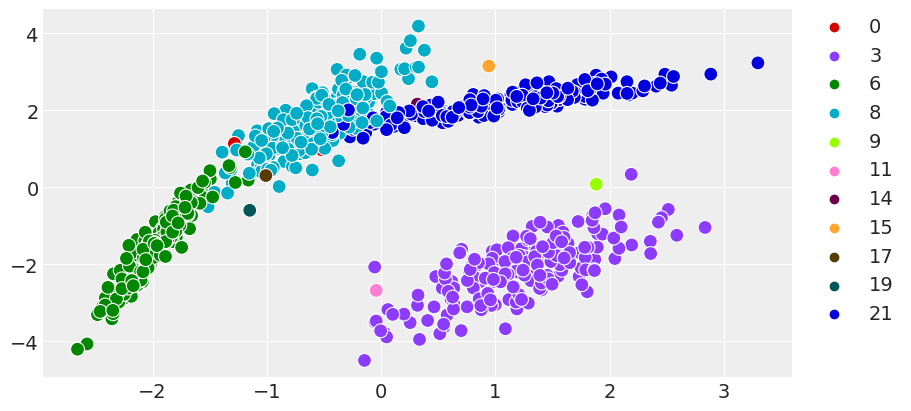


########################################################################################
########################################################################################
<201 / 1000>
498.08626 sec

Posterior cluster weights :
[0.004 0.001 0.    0.253 0.    0.001 0.266 0.002 0.217 0.001 0.001 0.002
 0.001 0.001 0.001 0.002 0.007 0.    0.    0.001 0.005 0.235 0.    0.
 0.   ]

Number of numerical errors: 0



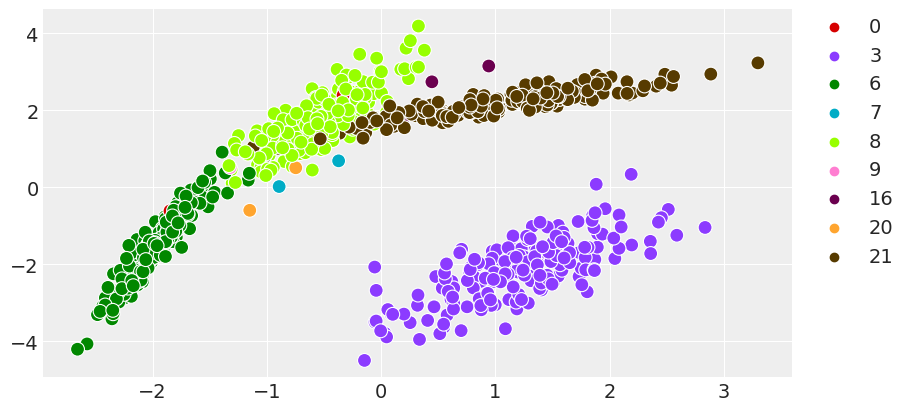


########################################################################################
########################################################################################
<401 / 1000>
516.72944 sec

Posterior cluster weights :
[0.012 0.004 0.002 0.25  0.    0.001 0.252 0.003 0.245 0.003 0.    0.003
 0.003 0.    0.001 0.003 0.002 0.005 0.001 0.001 0.001 0.206 0.    0.
 0.   ]

Number of numerical errors: 0



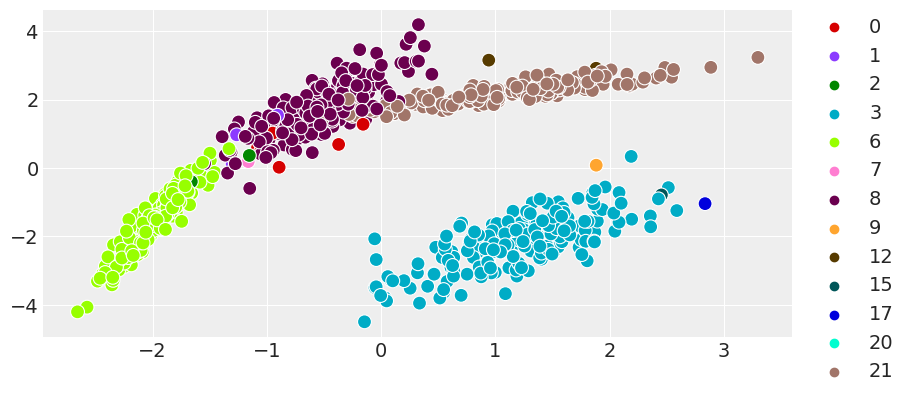


########################################################################################
########################################################################################
<601 / 1000>
499.51965 sec

Posterior cluster weights :
[0.    0.001 0.    0.24  0.002 0.003 0.235 0.004 0.285 0.001 0.002 0.001
 0.002 0.004 0.001 0.    0.001 0.001 0.003 0.008 0.001 0.206 0.    0.
 0.   ]

Number of numerical errors: 0



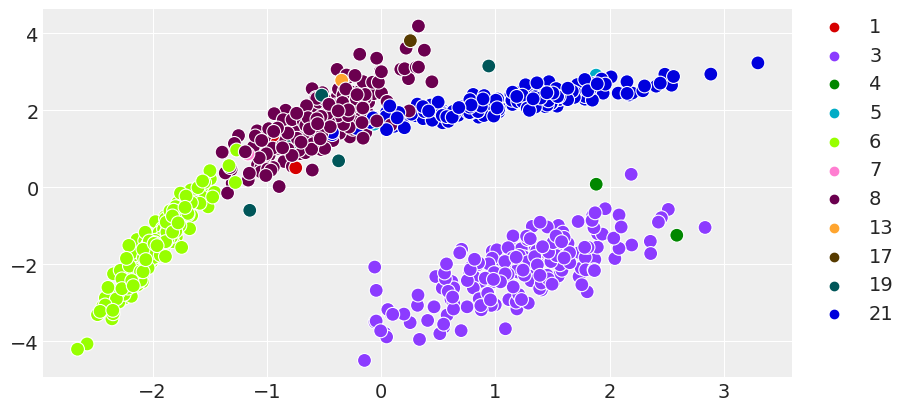


########################################################################################
########################################################################################
<801 / 1000>
493.39140 sec

Posterior cluster weights :
[0.006 0.001 0.    0.249 0.003 0.001 0.231 0.001 0.243 0.008 0.002 0.
 0.003 0.    0.001 0.006 0.004 0.008 0.001 0.002 0.    0.229 0.    0.
 0.   ]

Number of numerical errors: 0



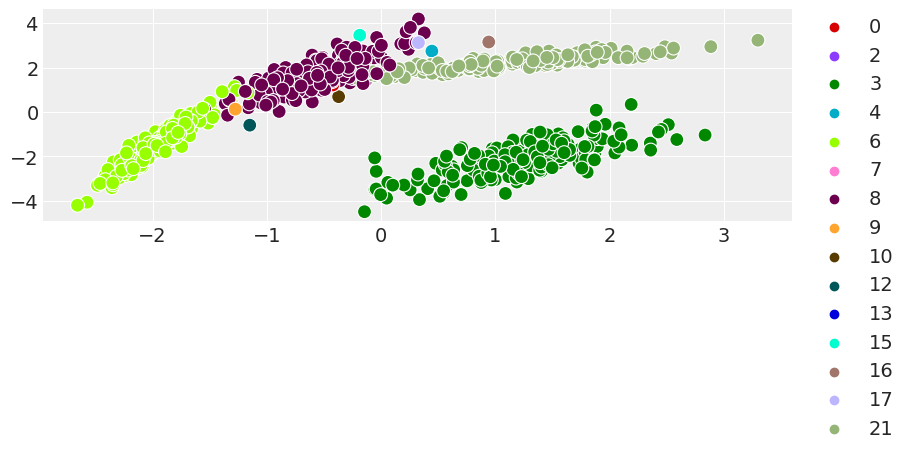


########################################################################################
########################################################################################
<1000 / 1000>
486.68540 sec

Posterior cluster weights :
[0.001 0.    0.    0.224 0.005 0.001 0.273 0.001 0.273 0.001 0.002 0.001
 0.    0.001 0.004 0.    0.013 0.001 0.005 0.006 0.    0.187 0.    0.
 0.   ]

Number of numerical errors: 0



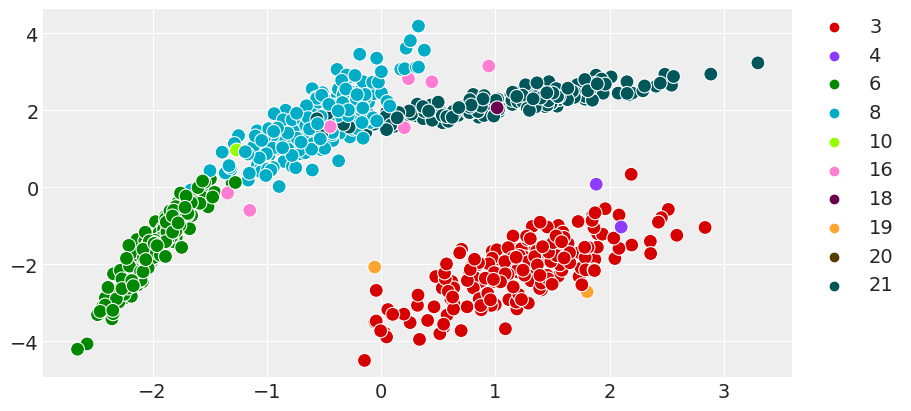


########################################################################################
########################################################################################
Sampling finished w/ total run time: 2753.59169 sec
Traces of ['C', 'PI', 'LAMBDA', 'NU', 'MU', 'S'] saved at current directory.


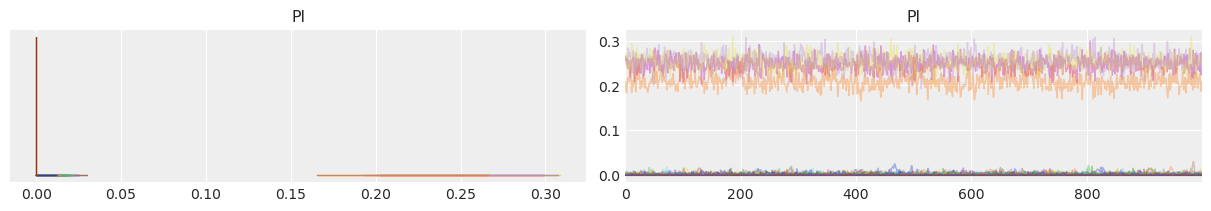

posterior probability greater than 1e-2: [ 3  6  8 21]


In [3]:
dpgmm = DPGMM_SBP(data, alpha=0.01)
dpgmm.fit_transform(num_iter=1000, burnin=0.1, verbose=200)

In [10]:
# probability of cluster assignment for specific data instance
idx = 0
sample = np.array(dpgmm.traces.posterior.C)[0][:, idx]
pd.Series(sample).value_counts() / len(sample)

8     0.953
21    0.024
18    0.003
12    0.003
19    0.002
2     0.002
20    0.002
4     0.001
11    0.001
16    0.001
1     0.001
15    0.001
0     0.001
13    0.001
14    0.001
17    0.001
9     0.001
5     0.001
dtype: float64